In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import os

In [2]:
everest_df = pd.read_csv(os.path.join("output/everest_sqlfinal.csv"))
everest_df.head()

,dayofweek,dayofyear,weekofyear,monthofyear,season,everest_wait
0,5,0,0,1,7,40
1,6,1,0,1,7,34
2,7,2,0,1,7,29
3,1,3,1,1,7,23
4,2,4,1,1,7,26


In [3]:
print('The shape of our features is:', everest_df.shape)

The shape of our features is: (1817, 6)


In [4]:
# Descriptive statistics for each column
everest_df.describe()

,dayofweek,dayofyear,weekofyear,monthofyear,season,everest_wait
count,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000
mean,3.998899,181.938360,26.105118,6.518987,3.570721,33.518437
std,2.000000,105.492434,15.075926,3.450850,1.703385,14.796967
min,1.000000,0.000000,0.000000,1.000000,1.000000,6.000000
25%,2.000000,91.000000,13.000000,4.000000,3.000000,23.000000
50%,4.000000,182.000000,26.000000,7.000000,3.000000,31.000000
75%,6.000000,273.000000,39.000000,10.000000,5.000000,41.000000
max,7.000000,365.000000,53.000000,12.000000,7.000000,127.000000


In [5]:
# Labels are the values we want to predict
labels =everest_df['everest_wait']
# Remove the labels from the features
# axis 1 refers to the columns
everest_df= everest_df.drop('everest_wait', axis = 1)
# Saving feature names for later use
feature_list = list(everest_df.columns)

In [6]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(everest_df, labels, test_size = 0.25, random_state = 42)

In [7]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1362, 5)
Training Labels Shape: (1362,)
Testing Features Shape: (455, 5)
Testing Labels Shape: (455,)


In [8]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [9]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'minutes.')

Mean Absolute Error: 8.3 minutes.


In [10]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 70.68 %.


In [11]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: dayofyear            Importance: 0.48
Variable: season               Importance: 0.22
Variable: dayofweek            Importance: 0.18
Variable: weekofyear           Importance: 0.11
Variable: monthofyear          Importance: 0.01


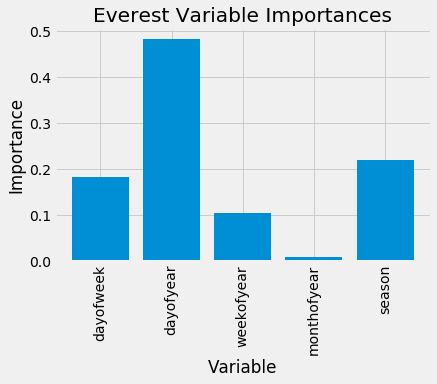

In [12]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Everest Variable Importances');
#Save Plot
plt.savefig("output/EverestML_VariableRanking.png")

In [13]:
everestML_df = pd.read_csv(os.path.join("data/MLpredict.csv"))
everestML_df.head()

,dayofweek,dayofyear,weekofyear,monthofyear,season
0,7,1,0,1,7
1,1,2,1,1,7
2,2,3,1,1,7
3,3,4,1,1,7
4,4,5,1,1,7


In [14]:
everestML_df["predicted_everest"]=rf.predict(everestML_df)

In [15]:
everestML_df

,dayofweek,dayofyear,weekofyear,monthofyear,season,predicted_everest
0,7,1,0,1,7,49.401
1,1,2,1,1,7,31.330
2,2,3,1,1,7,37.820
3,3,4,1,1,7,41.780
4,4,5,1,1,7,39.133
...,...,...,...,...,...,...
360,3,361,52,12,7,55.370
361,4,362,52,12,7,66.338
362,5,363,52,12,7,75.891
363,6,364,0,12,7,64.205


In [16]:
# Export file as a CSV, without the Pandas index, but with the header
everestML_df.to_csv("output/everestML_predictions.csv", index=False, header=True)